In [1]:
!pip3 install statsmodels --upgrade
!pip3 install quandl
!pip3 install nasdaq-data-link
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


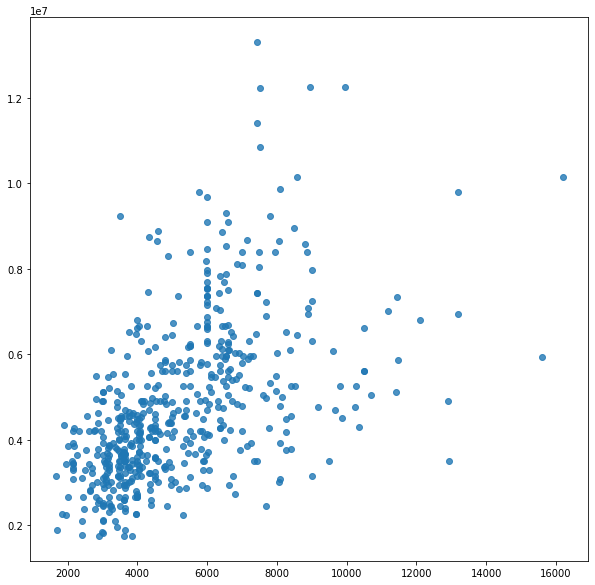

In [4]:
fig = plt.figure(figsize=(10,10))
plt.plot(df.area, df.price,'o', alpha=0.8)
plt.show()

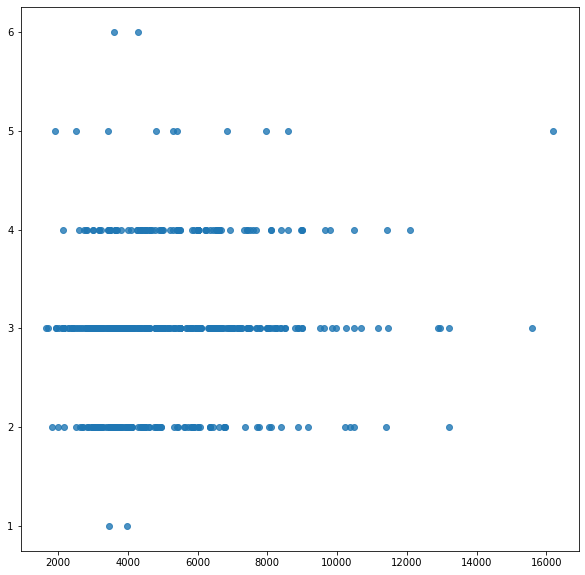

In [5]:
fig = plt.figure(figsize=(10,10))
plt.plot(df.area, df.bedrooms,'o', alpha=0.8)
plt.show()

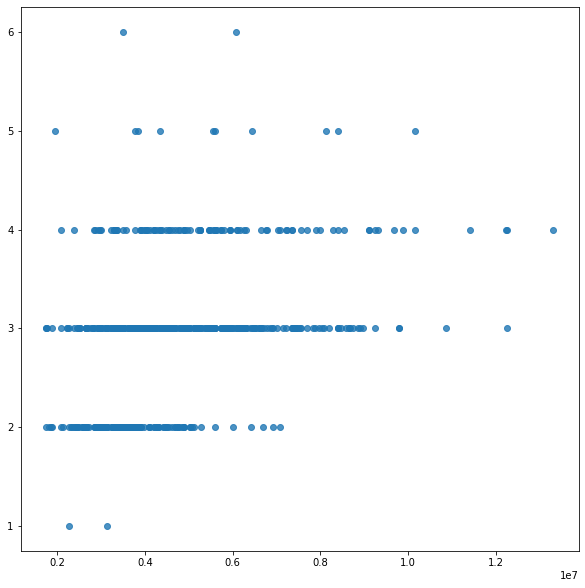

In [6]:
fig = plt.figure(figsize=(10,10))
plt.plot(df.price, df.bedrooms,'o', alpha=0.8)
plt.show()

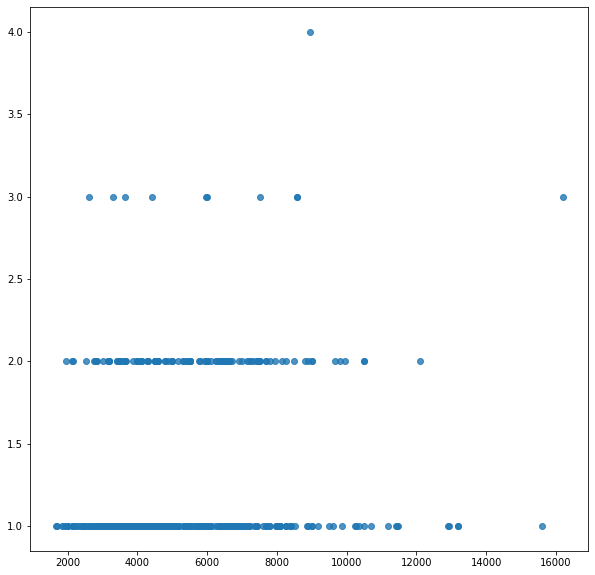

In [7]:
fig = plt.figure(figsize=(10,10))
plt.plot(df.area, df.bathrooms,'o', alpha=0.8)
plt.show()

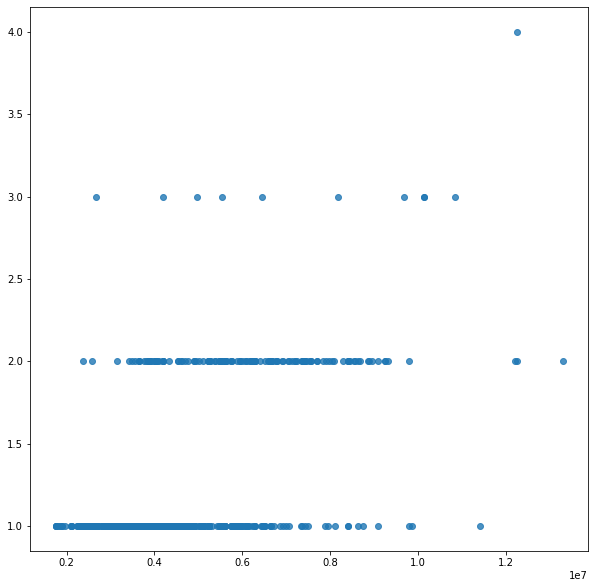

In [8]:
fig = plt.figure(figsize=(10,10))
plt.plot(df.price, df.bathrooms,'o', alpha=0.8)
plt.show()

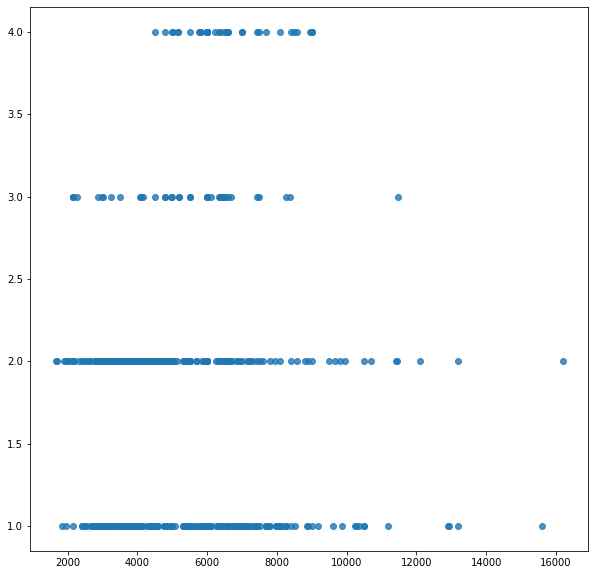

In [9]:
fig = plt.figure(figsize=(10,10))
plt.plot(df.area, df.stories,'o', alpha=0.8)
plt.show()

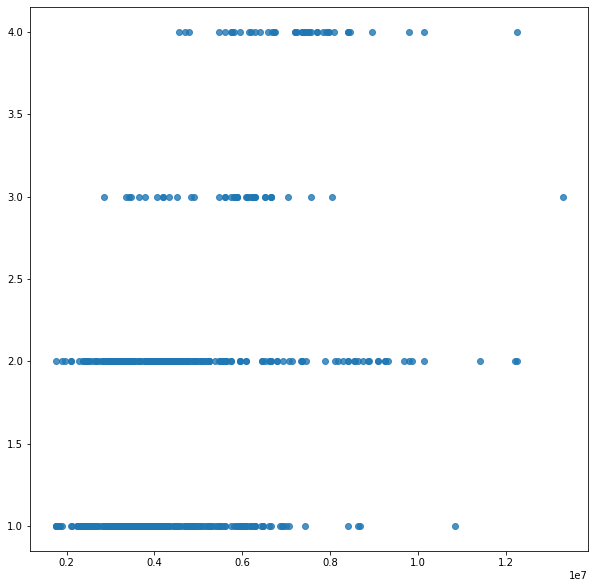

In [10]:
fig = plt.figure(figsize=(10,10))
plt.plot(df.price, df.stories,'o', alpha=0.8)
plt.show()

In [11]:
df = df[df['area'] < 12000]
df = df[df['price'] < 12250000]

In [12]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished


In [13]:
#df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0 })

In [14]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
3,12215000,7500,4,2,2,yes,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,yes,1,1,0,1,2,0,2
5,10850000,7500,3,3,1,yes,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,yes,0,0,0,1,2,1,1
8,9870000,8100,4,1,2,yes,1,1,0,1,2,1,2


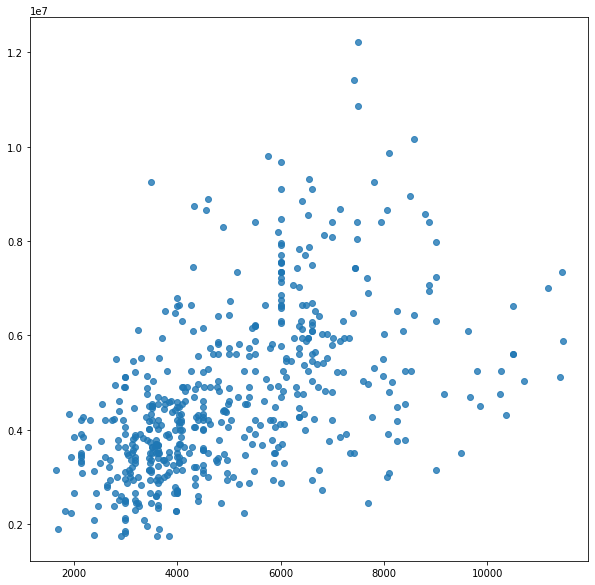

In [15]:
fig = plt.figure(figsize=(10,10))
plt.plot(df.area, df.price,'o', alpha=0.8)
plt.show()

In [16]:
df.corr()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.531056,0.358279,0.492967,0.421532,0.294124,0.199823,0.099655,0.468220,0.362208,0.323265,0.297803
area,0.531056,1.000000,0.135337,0.174957,0.108098,0.192364,0.062608,-0.033549,0.250878,0.350739,0.257856,0.167475
bedrooms,0.358279,0.135337,1.000000,0.354943,0.404865,0.087084,0.112498,0.061927,0.160399,0.133468,0.074445,0.125145
bathrooms,0.492967,0.174957,0.354943,1.000000,0.308563,0.142153,0.121409,0.081445,0.187630,0.158438,0.061360,0.141023
stories,0.421532,0.108098,0.404865,0.308563,1.000000,0.045074,-0.172444,0.028290,0.288497,0.033141,0.037565,0.099184
guestroom,0.294124,0.192364,0.087084,0.142153,0.045074,1.000000,0.375127,-0.008236,0.141536,0.047720,0.166916,0.125685
basement,0.199823,0.062608,0.112498,0.121409,-0.172444,0.375127,1.000000,-0.008202,0.050315,0.054282,0.226639,0.112515
hotwaterheating,0.099655,-0.033549,0.061927,0.081445,0.028290,-0.008236,-0.008202,1.000000,-0.127172,0.071774,-0.054839,0.022470
airconditioning,0.468220,0.250878,0.160399,0.187630,0.288497,0.141536,0.050315,-0.127172,1.000000,0.148319,0.115118,0.144617
parking,0.362208,0.350739,0.133468,0.158438,0.033141,0.047720,0.054282,0.071774,0.148319,1.000000,0.078624,0.155041


In [24]:
Y = df.price
X = df[['area', 'bedrooms', 'stories', 'bathrooms', 'airconditioning']]
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              1922.
Date:                Wed, 23 Mar 2022   Prob (F-statistic):                        0.00
Time:                        23:13:55   Log-Likelihood:                         -8223.4
No. Observations:                 535   AIC:                                  1.646e+04
Df Residuals:                     530   BIC:                                  1.648e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [33]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
np.random.seed(69)
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    res=sm.OLS(y_train,X_train).fit()
    R_IS.append(res.rsquared)   
    y_pred=res.predict(X_test)
    R_OS.append(r2_score(y_test,y_pred))
    
    #R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.948+-0.003
OS R-squared is 0.565+-0.041


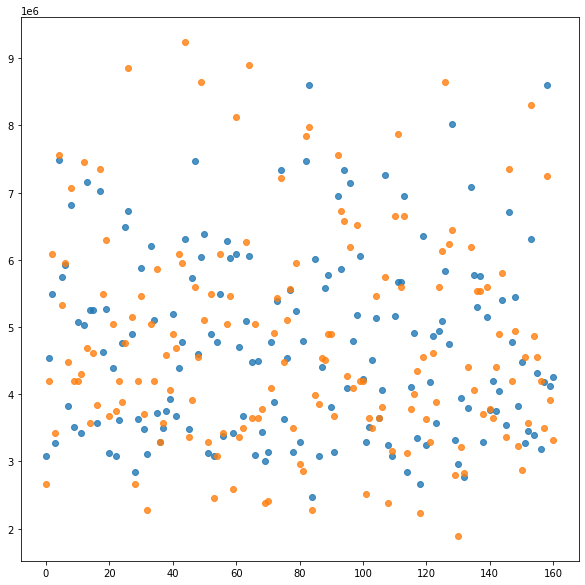

In [36]:
y_test = y_test.reset_index().iloc[:,1:]
y_pred = y_pred.reset_index().iloc[:,1:]
fig = plt.figure(figsize=(10,10))
plt.plot(y_pred,'o', alpha=0.8)
plt.plot(y_test,'o', alpha = 0.8)
plt.show()

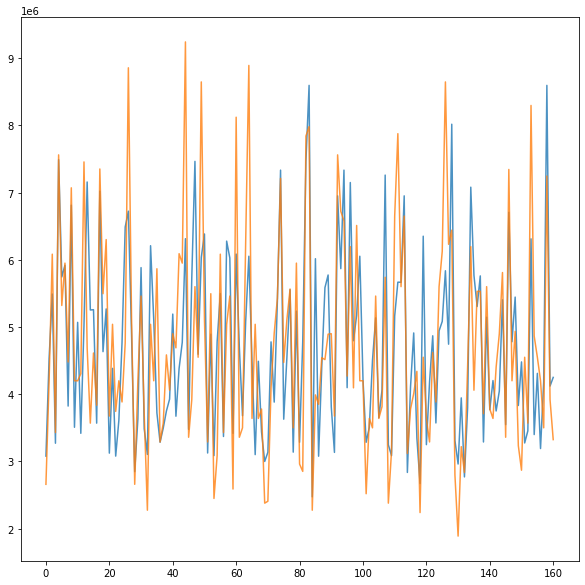

In [37]:
fig = plt.figure(figsize=(10,10))
plt.plot(y_pred, alpha=0.8)
plt.plot(y_test, alpha = 0.8)
plt.show()

In [39]:
## train a linear model based on above N PCs and report out of sample accuracy (with cross-validation)
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    res=sm.OLS(y_train,X_train).fit_regularized(alpha=0.001, L1_wt=0.1, refit=True) 
    R_IS.append(res.rsquared)
    y_pred=res.predict(X_test)
    R_OS.append(r2_score(y_test,y_pred))

print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))


IS R-squared is 0.948+-0.003
OS R-squared is 0.563+-0.048


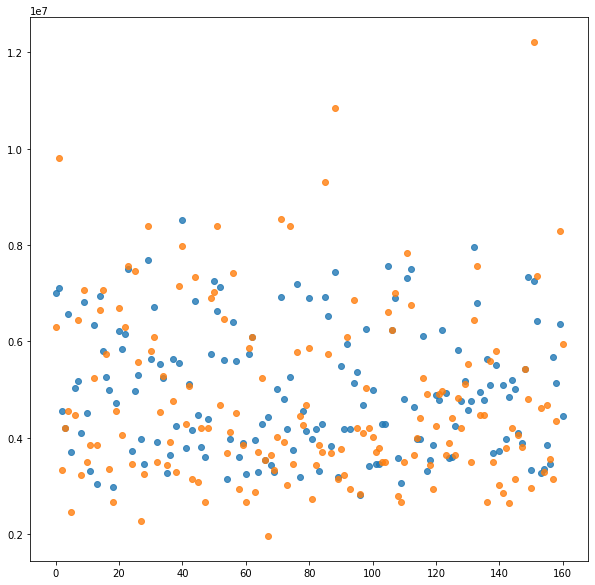

In [40]:
y_test = y_test.reset_index().iloc[:,1:]
y_pred = y_pred.reset_index().iloc[:,1:]
fig = plt.figure(figsize=(10,10))
plt.plot(y_pred,'o', alpha=0.8)
plt.plot(y_test,'o', alpha = 0.8)
plt.show()

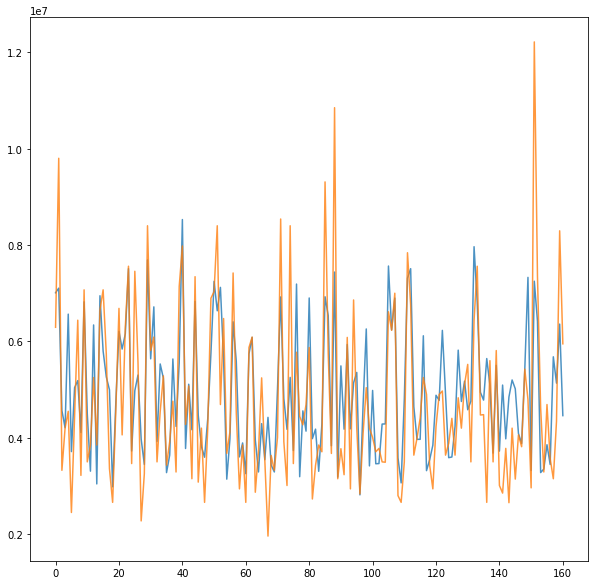

In [41]:
fig = plt.figure(figsize=(10,10))
plt.plot(y_pred, alpha=0.8)
plt.plot(y_test, alpha = 0.8)
plt.show()

In [42]:
from sklearn.ensemble import RandomForestRegressor
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    regressor = RandomForestRegressor(n_estimators=20, random_state=0)
    regressor.fit(X_train, y_train)   
    y_pred = regressor.predict(X_test)
    R_OS.append(r2_score(y_test,y_pred))
    
    #R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())

print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))


OS R-squared is 0.451+-0.065


In [43]:
y_test = y_test.reset_index().iloc[:,1:]

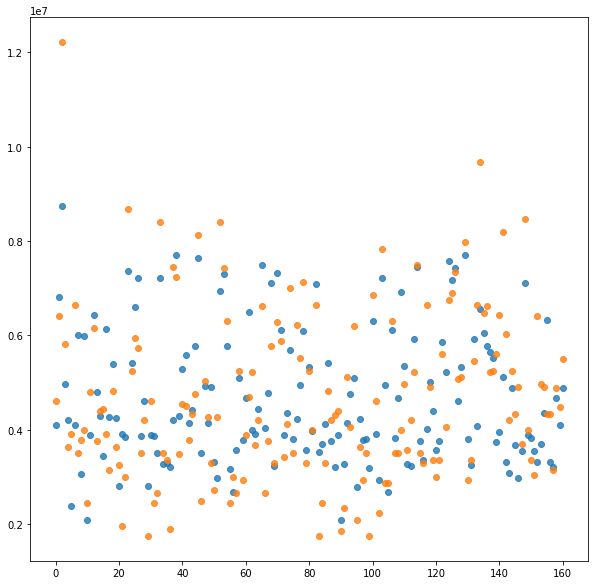

In [44]:
fig = plt.figure(figsize=(10,10))
plt.plot(y_pred,'o', alpha=0.8)
plt.plot(y_test,'o', alpha = 0.8)
plt.show()

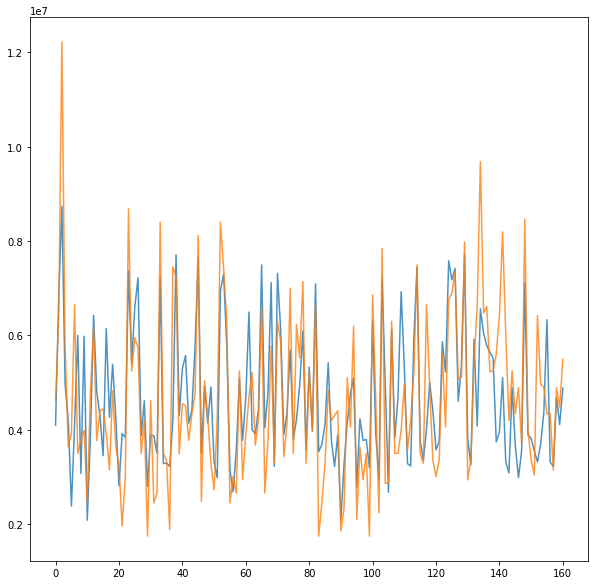

In [45]:
fig = plt.figure(figsize=(10,10))
plt.plot(y_pred, alpha=0.8)
plt.plot(y_test, alpha = 0.8)
plt.show()

In [23]:
# orange is the prediced while blue is the original 
# model seems to fit properly between 0.4 to 0.8 1e7 however above or below that the predictions become out of context
# most of the error arises due model overpredicting cost which is aceptable than underprediction
# trained model is good to provide a ceiling for the price but not a floor